# 1- Load data 

Firstly, you should download data from classroom. Then upload it to the colab enviroment through files section in the side bar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
car_prices_data =  pd.read_csv('/content/CarPrice_Assignment.csv')

In [3]:
car_prices_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# 2- Explore Data

You may choose one or more method like: info , discribe , check for missing data ,etc. 

In [5]:
car_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
car_prices_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
car_prices_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
missing = car_prices_data.isnull().sum()
print(missing)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [9]:
#Check Missing Values
car_prices_data.isna().sum().sum()

0

In [10]:
#Check Duplicates
car_prices_data.duplicated().sum()

0

**No nulls nor duplicates.**

# 3- Sperate features 

## Quantitvative Data 

In [15]:
quantitative = [f for f in car_prices_data.columns if car_prices_data.dtypes[f] != 'object'] 
quantitative_data = car_prices_data[quantitative]

In [16]:
quantitative_data.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Qualitative Data 




In [19]:
qualitative = [f for f in car_prices_data.columns if car_prices_data.dtypes[f] == 'object']
qualitative_data = car_prices_data[qualitative]

In [20]:
qualitative_data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

# 4 - Visulaization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

## Output
The output is 'price' coloum

In [21]:
car_prices_data['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

Text(0.5, 1.0, 'Distribution of Car price')

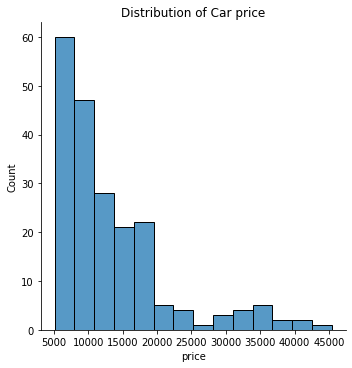

In [25]:
ax= sns.displot(data=car_prices_data['price'], kde=False)
plt.title("Distribution of Car price")

Text(0.5, 1.0, 'Distribution of Car price')

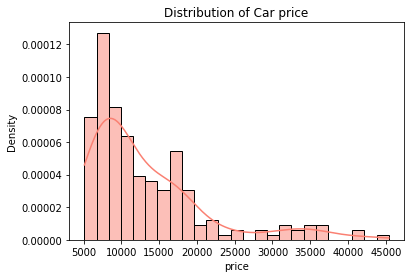

In [27]:
sns.histplot(car_prices_data['price'], color='#FA8072', kde=True, stat="density", linewidth=1, bins=25);
plt.title("Distribution of Car price")

## Quantitvative Data 

Use histogram or any other preferred method you prefer to visualize your data (one feature is enough)

### Door Number Count

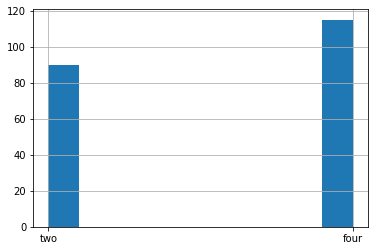

In [34]:
car_prices_data['doornumber'].hist(bins=10)

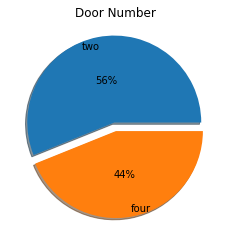

In [43]:
percentage = car_prices_data['doornumber'].value_counts()
mylabels = car_prices_data['doornumber'].unique()
plt.pie(percentage, labels = mylabels, explode = [0.1, 0], shadow = True, autopct='%.0f%%', pctdistance=0.5, labeldistance=0.9)
plt.title('Door Number')
plt.show()

### Horse Power

Text(0.5, 1.0, 'Distribution of Horse power')

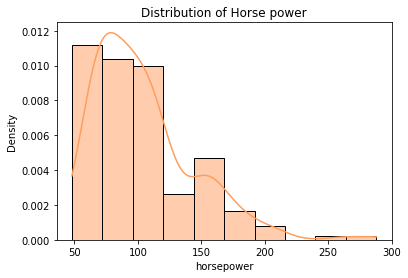

In [28]:
sns.histplot(car_prices_data['horsepower'], color='#FF9D5C', kde=True, stat="density", linewidth=1, bins=10);
plt.title("Distribution of Horse power")

### Quantitative Data Distributions.

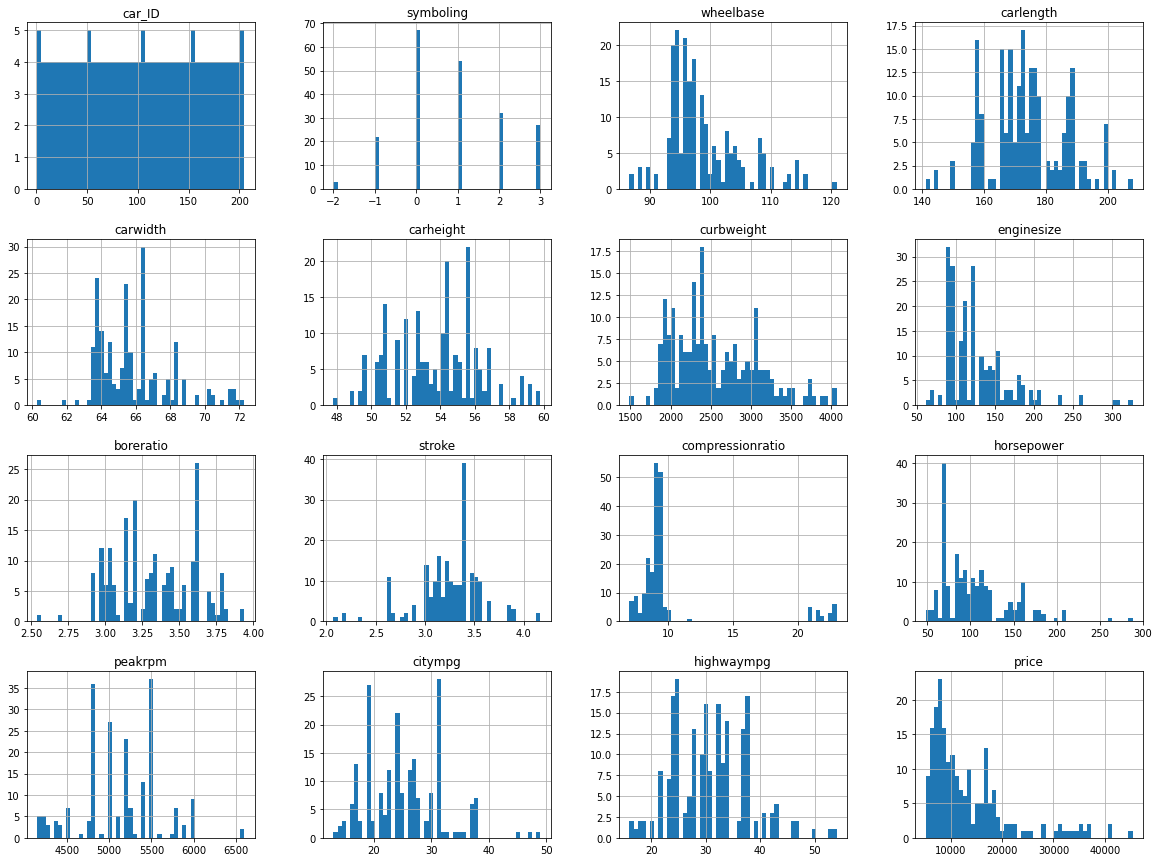

In [44]:
quantitative_data.hist(bins=50, figsize=(20,15))
plt.show()

Visualize the Correlation Matrix

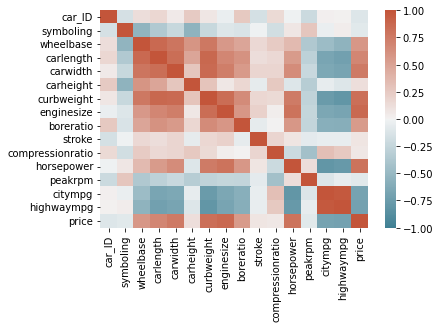

In [46]:
# Correlation Matrix of Quintitative Types
corr = quantitative_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, as_cmap=True)
)

In [45]:
corr_matrix = car_prices_data.corr()
corr_matrix["enginesize"].sort_values(ascending=False)

enginesize          1.000000
price               0.874145
curbweight          0.850594
horsepower          0.809769
carwidth            0.735433
carlength           0.683360
boreratio           0.583774
wheelbase           0.569329
stroke              0.203129
carheight           0.067149
compressionratio    0.028971
car_ID             -0.033930
symboling          -0.105790
peakrpm            -0.244660
citympg            -0.653658
highwaympg         -0.677470
Name: enginesize, dtype: float64

In [47]:
qdata = car_prices_data[quantitative+['price']]
qdata.columns
corr_matrix = quantitative_data.corr()
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Choose one variable and do your analysis on it. Give insights!

Consider the following:

1. Its visualization 
2. Missing data
3. Correlation with the output
4. Description of the feature

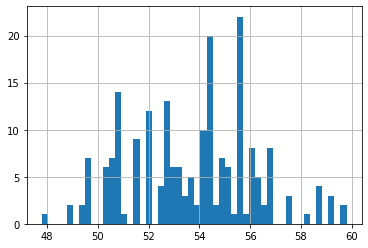

In [48]:
car_prices_data['carheight'].hist(bins = 50)

In [49]:
missingcarheight = car_prices_data['carheight'].isnull().sum()
print(missingcarheight)

0


In [50]:
corr_matrix["price"]['carheight']

0.11933622657049496

**This feature relates the height of the car to the price of it, but they are not correlated.**

## Qualitative Data 

Use boxplot or any other preferred method you prefer to visualize your data (one feature is enough)

Choose one variable and do your analysis on it.

Consider the following:

1. Its visualization 
2. Missing data
3. Correlation with the output
4. Description of the feature

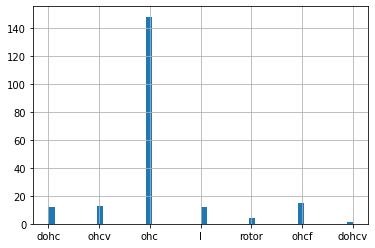

In [51]:
car_prices_data['enginetype'].hist(bins = 50)

In [52]:
miss = car_prices_data['enginetype'].isnull().sum()
print(miss)

0


**This feature describes the type of the motor. There are several motor types like: dohc, ohcv, etc...**

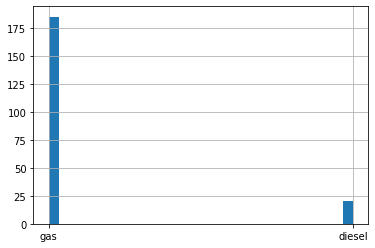

In [53]:
car_prices_data['fueltype'].hist(bins = 30)

In [54]:
miss1 = car_prices_data['fueltype'].isnull().sum()
print(miss1)

0


**This feature shows the the fuel type of the cars. There are 2 types of fuels: gas, diesel. The use of gas is much more than the gas.**